In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import numpy as np
import time
import copy
import os
import PIL
%matplotlib inline
plt.ion()

In [21]:
baseDirectory = 'g:/Selim/Thesis/Code/PyTorch/'
setDirectory = 'Flower'
setImageSize = 128

# 3MAll set mean and std values
# mean : 0.498283411655
# std : 0.0879390792679
setMean = [0.498, 0.498, 0.498]
setStd = [0.087, 0.087, 0.087]

dataTransforms = {
    'train': transforms.Compose([
        transforms.Scale(setImageSize),
        transforms.RandomCrop(setImageSize),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean=setMean, std=setStd)
    ]),
    'test': transforms.Compose([
        transforms.RandomCrop(setImageSize),
        transforms.Scale(setImageSize),
        transforms.ToTensor(),
        transforms.Normalize(mean=setMean, std=setStd)
    ]),
}

In [22]:
setPath = os.path.join(baseDirectory, setDirectory)
datasets = {x: torchvision.datasets.ImageFolder(os.path.join(setPath, x), dataTransforms[x])
           for x in ['train', 'test']}

datasetLoaders = {x: torch.utils.data.DataLoader(datasets[x], batch_size=4, shuffle=True, num_workers=4)
                for x in ['train', 'test']}

testLoader = torch.utils.data.DataLoader(datasets['test'], batch_size=1, shuffle=False, num_workers=4)

datasetSizes = {x: len(datasets[x]) for x in ['train', 'test']}
datasetClasses = datasets['train'].classes

useGPU = torch.cuda.is_available()

print(str(datasetSizes) + ' images will be used.' )
print('GPU will ' + ('' if useGPU else 'not ') + 'be used.' )

{'train': 4, 'test': 8} images will be used.
GPU will be used.


In [23]:
def ImShow(input, title=None):
    input = input.numpy().transpose((1, 2, 0))
    input = setStd * input + setMean
    plt.figure(figsize=(8,8))
    plt.imshow(input)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)

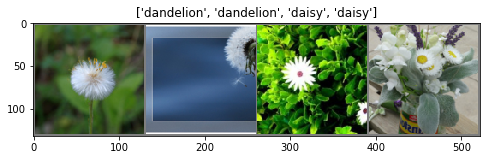

In [37]:
inputs, classes = next(iter(datasetLoaders['train']))
out = torchvision.utils.make_grid(inputs)
ImShow(out, title=[datasetClasses[x] for x in classes])